## Exercise 1

Consider the following outcomes:

| $X$ | $C_0$ | $C_1$ |
|-----|-------|-------|
| 0   | 1     | 1*    |
| 0   | 0     | 0*    |
| 0   | 0     | 0*    |
| 1   | 1*    | 1     |
| 1   | 1*    | 1     |
| 1   | 1*    | 0     |

Then 
$$\theta = \mathbb{E}[C_1] - \mathbb{E}[C_0] = \frac{3}{6} - \frac{4}{6} = - \frac{1}{6}$$
but
$$\alpha = \mathbb{E}[Y | X=1] - \mathbb{E}[Y | X=0] = \frac{2}{3} - \frac{1}{3} = \frac{1}{3}.$$

## Exercise 2

Example 16.5 demonstrates that in general $\theta(x) \neq r(x)$.

Under random assignment, $X$ does not depend on $\{C(x) : x \in \mathcal{X}\}$, so $\mathbb{E}[C(x)] = \mathbb{E}[C(x) | X = x]$. Then
$$\theta(x) = \mathbb{E}[C(x)] = \mathbb{E}[C(x) | X=x] = \mathbb{E}[C(X) | X = x] = \mathbb{E}[Y | X = x] = r(x).$$

## Exercise 3

We have
$$\begin{split}
\theta 
&= \mathbb{E}[C_1] - \mathbb{E}[C_0] \\
&= \mathbb{E}[C_1 | X = 1] \mathbb{P}[X = 1] + \mathbb{E}[C_1 | X = 0] \mathbb{P}[X = 0] - \mathbb{E}[C_0 | X = 1] \mathbb{P}[X = 1] - \mathbb{E}[C_0 | X = 0] \mathbb{P}[X = 0]
\end{split},$$
where $\mathbb{E}[C_1 | X = 0]$ and $\mathbb{E}[C_0 | X = 1]$ are unobserved.

Then $\theta$ is maximised when $\mathbb{E}[C_1 | X = 0] = 1$ and $\mathbb{E}[C_0 | X = 1] = 0$, so
$$\max \theta = \mathbb{E}[C_1 | X = 1] \mathbb{P}[X = 1] + \mathbb{P}[X = 0] - \mathbb{E}[C_0 | X = 0] \mathbb{P}[X = 0],$$
and $\theta$ is minimised when $\mathbb{E}[C_1 | X = 0] = 0$ and $\mathbb{E}[C_0 | X = 1] = 1$, so
$$\begin{split}
\min \theta 
&= \mathbb{E}[C_1 | X = 1] \mathbb{P}[X = 1] - \mathbb{P}[X = 1] - \mathbb{E}[C_0 | X = 0] \mathbb{P}[X = 0]  \\
&= \mathbb{E}[C_1 | X = 1] \mathbb{P}[X = 1] + \mathbb{P}[X = 0] - 1 - \mathbb{E}[C_0 | X = 0] \mathbb{P}[X = 0]. \\
\end{split}$$
We can also see that
$$\max \theta = \min \theta + 1.$$

## Exercise 4

We generate $X$ such that $\mathbb{E}[X | \beta]$ is a decreasing function of $\beta$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
rng = np.random.default_rng(12345)

In [3]:
n = 200

In [4]:
betas = stats.lognorm.rvs(scale=np.exp(-0.5), s=1, size=n, random_state=rng) 

In [5]:
x_mean = 5 / (betas + 1)

In [6]:
xs = {
    'Exponential $E[X|\\beta]$': stats.expon.rvs(scale=1 / x_mean, size=betas.shape[0], random_state=rng),
    'Normal $E[X|\\beta]$ with large variance': stats.norm.rvs(loc=x_mean, scale=5, size=n, random_state=rng),
    'Normal $E[X|\\beta]$ with small variance': stats.norm.rvs(loc=x_mean, scale=0.2, size=n, random_state=rng),
}

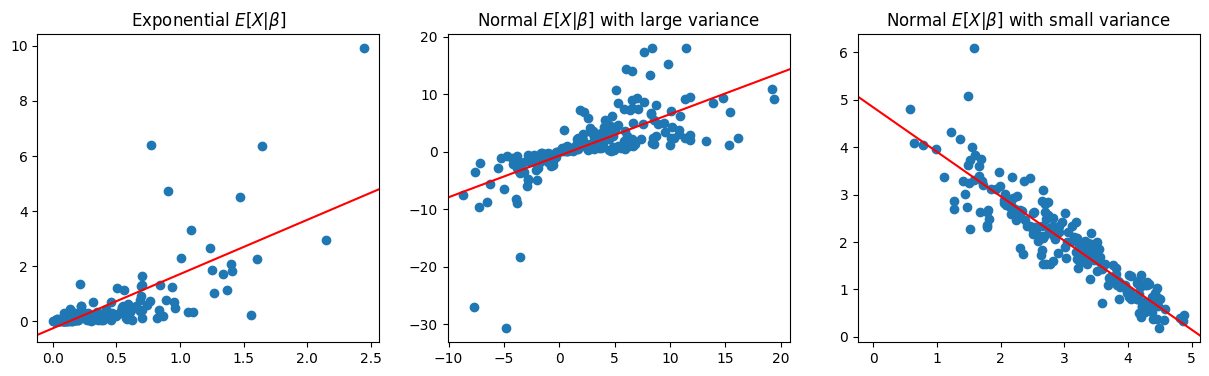

In [7]:
fig, axs = plt.subplots(1, len(xs), figsize=(len(xs) * 5, 4))

for i, (key, x) in enumerate(xs.items()):
    lf = sm.OLS(betas * x, sm.add_constant(x)).fit()
    axs[i].scatter(x, betas * x);
    axs[i].axline((0, lf.params[0]), (1, lf.params[0] + lf.params[1]), color='red');
    axs[i].set_title(key);

This further illustrates the point of Theorem 16.4: although the function $C_i(x)$ is linearly increasing with probability 1, the regression function might be decreasing if the treatment dose depends on the individual.

## Exercise 5

Given random assignment, we have
$$\begin{split}
F_0(y) &= F_{Y|X}(y|X=0) = \frac{F_{X,Y}(0, y)}{\lim_{y\to\infty} F_{X, Y}(0, y)}, \\
F_1(y) &= F_{Y|X}(y|X=1) = \frac{F_{X,Y}(1, y)}{\lim_{y\to\infty} F_{X, Y}(1, y)}, \\
\end{split}$$
so $\theta = F_{1}^{-1}\left(\frac{1}{2}\right) - F_{0}^{-1}\left(\frac{1}{2}\right)$ can be expressed via $F_{X,Y}$.